# Ψηφιακή Επεξεργασία Σημάτων: 1η Εργαστηριακή Ασκηση.

* Ανδρέας Βεζάκης ΑΜ: 03117186
* Ιάσων Χατζηθεοδώρου ΑΜ: 03117089

# Άσκηση 1

### Ερώτημα 1.1:

In [2]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import librosa.output as lb
import librosa as lb
import pywt
import scipy as sc
import math

row = np.array([0.5346, 0.5906, 0.6535, 0.7217])
column = np.array([0.9273, 1.0247, 1.1328])
digit_sounds = np.empty(10, dtype = object)

end = 1000

#Avoid value 0 so that there is no zero value is the digit_sounds
n = np.arange(1, end + 1, end / 1000)

digit_sounds[0] = np.sin(0.7217*n) + np.sin(1.0247*n)

len_row_without_last = len(row) - 1
for i in range(len_row_without_last) :
    a = row[i]
    for j in range(len(column)) :
        b = column[j]
        digit_sounds[len_row_without_last * i + j + 1] = np.sin(a*n) + np.sin(b*n)


sd.play(digit_sounds[9], 8192)


C:\Users\Antreas\anaconda3\envs\env_name\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


 ### Ερώτημα 1.2:

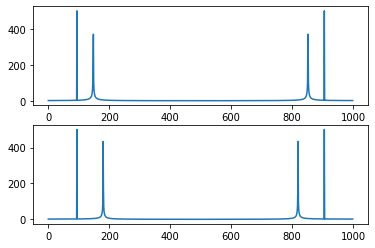

In [2]:
fourier_digit_sounds = np.empty(10, dtype = object)
for i in range(10) : fourier_digit_sounds[i] = np.abs(np.fft.fft(digit_sounds[i]))

plt.subplot(2, 1, 1)
plt.plot(fourier_digit_sounds[4])
plt.subplot(2, 1, 2)
plt.plot(fourier_digit_sounds[6])
plt.show()

 ### Ερώτημα 1.3:

sum = 03117186 + 03117089 = 06234275


In [ ]:
dig_list = [0, 6, 2, 3, 4, 2, 7, 5]
signal = np.empty(0)
for i in dig_list:
    signal = np.concatenate((signal, digit_sounds[i]))
    signal = np.concatenate(((signal, np.zeros(100))))

sd.play(signal, 8192)
lb.write_wav("tone_sequence.wav", signal, 8192)   

 ### Ερώτημα 1.4:

In [5]:
#Window is rectangular
w_1 = np.ones(1000)

#Window is Hamming
w_2 = np.hamming(1000)

#Function that windows
def fourier_window_signal_with (sig, zeros_between, wind_fun) :
    len_sig = np.size(sig)
    len_window = np.size(wind_fun)
    
    windows = np.array([sig[i:(i+len_window)] * wind_fun[:] for i in range(0, len_sig, len_window + zeros_between)])
        
    windows = np.array([np.abs(np.fft.fft(x)) for x in windows])
    return windows

rect_windows_fourier = fourier_window_signal_with (signal, 100, w_1)
hamming_windows_fourier = fourier_window_signal_with (signal, 100, w_2)

* Τετραγωνικά Παράθυρα:

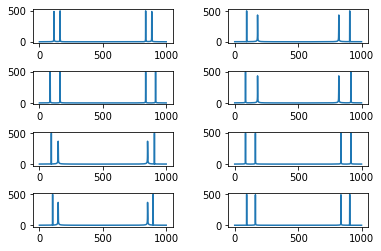

In [6]:
for i in range(8) :
    plt.subplot(4, 2, i + 1)
    plt.plot(abs(rect_windows_fourier[i]))

plt.subplots_adjust(wspace = 0.4, hspace = 0.8)
plt.show()

* Hamming Παράθυρα

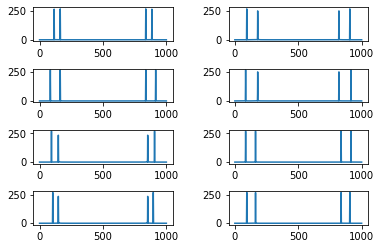

In [7]:
for i in range(8) :
    plt.subplot(4, 2, i + 1)
    plt.plot(abs(hamming_windows_fourier[i]))

plt.subplots_adjust(wspace = 0.4, hspace = 0.8)
plt.show()

 ### Ερώτημα 1.5

In [10]:

fourier_of_row = np.array([abs(np.fft.fft(np.sin(x*n))) for x in row])
k_row = np.array([sc.signal.find_peaks(x)[0][0] for x in fourier_of_row])

fourier_of_column = np.array([abs(np.fft.fft(np.sin(x*n))) for x in column])
k_column = np.array([sc.signal.find_peaks(x)[0][0] for x in fourier_of_column])

#Create k
k = np.empty((10, 2))
k[0] = np.array([k_row[3], k_column[1]])

for i in range(len_row_without_last) :
    for j in range(np.size(k_column)) : 
        k[len_row_without_last * i + j + 1][0] = k_row[i]
        k[len_row_without_last * i + j + 1][1] = k_column[j]
        
for i in range(np.shape(k)[0]):
    print("Peaks of digit", i, "are at positions:", int(k[i][0]), int(k[i][1]))

Peaks of digit 0 are at positions: 115 163
Peaks of digit 1 are at positions: 85 148
Peaks of digit 2 are at positions: 85 163
Peaks of digit 3 are at positions: 85 180
Peaks of digit 4 are at positions: 94 148
Peaks of digit 5 are at positions: 94 163
Peaks of digit 6 are at positions: 94 180
Peaks of digit 7 are at positions: 104 148
Peaks of digit 8 are at positions: 104 163
Peaks of digit 9 are at positions: 104 180


 ### Ερώτημα 1.6

In [11]:
#Returns the signal without zeros
def remove_zeros(sig) :
    return sig[sig != 0]

In [14]:
#Returns absolute value DFT of the windows
def fourier_windowing (sig) :
    tones = remove_zeros(sig)
    
    len_tones = np.size(tones)
    num_of_tones = len_tones // 1000
    
    windows = np.empty(num_of_tones, dtype = object)

    for i in range(0, len_tones, 1000) : 
        windows[i // 1000] = tones[i : (i+1000)]
    
    windows = np.array([np.abs(np.fft.fft(x)) for x in windows])
    return windows

In [13]:
#Returns list of digits pressed
def ttdecode(sig) :
    ans = []
    windows = fourier_windowing(sig)
    
    for x in windows :
        len_k = np.shape(k)[0]
        
        #Energy is maximized when the absolute of the DFT is maximized
        peaks = sc.signal.find_peaks(x, height = 100)[0]
        
        #temp stores the first two peaks
        temp = np.array([peaks[0], peaks[1]])
        for i in range(len_k) :
            if np.array_equal(temp, k[i]) : ans.append(i)
        
    for x in ans : print(x, end = " ")
    print("\n")
    return

print("The digits of the signal we created are:", end = " ")
ttdecode(signal)

The digits of the signal we created are: 0 6 2 3 4 2 7 5 



 ### Eρώτημα 1.7:

In [15]:
easySig = np.load("easySig.npy")
hardSig = np.load("hardSig.npy")

print("The digits of the signal easySig are:", end = " ")
ttdecode(easySig)
print("The digits of the signal hardSig are:", end = " ")
ttdecode(hardSig)

The digits of the signal easySig are: 1 3 2 6 3 9 0 0 

The digits of the signal hardSig are: 9 0 9 6 3 2 1 1 9 1 



# Ασκηση 2

# 2.1. 
### α):

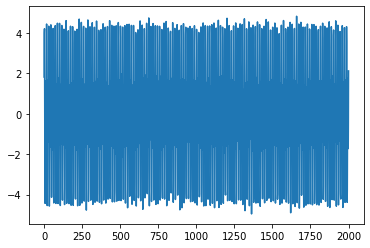

In [2]:
Fs = 1000;
Ts = 1/Fs
n = np.linspace(0,2000,2000)
x = 2*np.cos(2*np.pi*70*n*Ts) + 3*np.sin(2*np.pi*140*n*Ts) + 0.15*np.random.normal(0, 1, 2000)
plt.plot(n, x)

### β):

In [3]:
STFT = lb.core.stft(x, 2048, 20, 40)
print(STFT.shape)

(1025, 101)


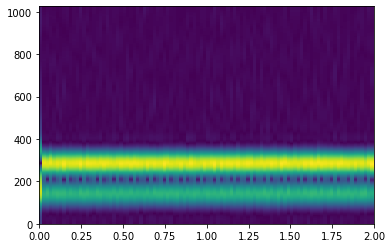

In [9]:
t = np.linspace(0, 2, 101)
f = np.linspace(0, 1025, 1025)
plt.pcolormesh(t, f, np.abs(STFT))

### γ):

In [25]:
s = np.power(2, np.linspace(1, 6, 100))
coefs,freqs = pywt.cwt(x, s, 'cmor3.0-1.0')
print(coefs.shape)

(100, 2000)


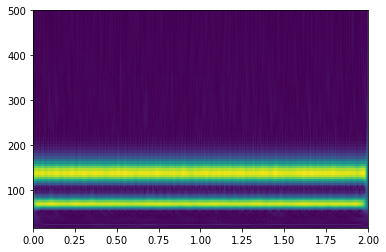

In [26]:
t = np.linspace(0,2,2000)
f = freqs*1000
plt.pcolormesh(t,f,np.abs(coefs))

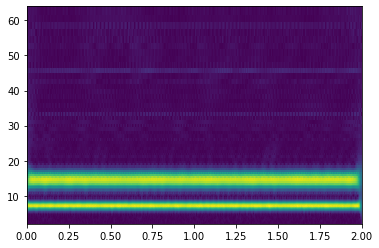

In [27]:
plt.pcolormesh(t,s,np.abs(coefs))

### δ)

  Παρατηρούμε ότι ο DT-CWT μετασχηματισμός ή μετασχηματισμός των
Wavelets, λόγω του ότι η συχνότητα εξαρτάται από το μήκος παραθύρου,
παρουσιάζει καλύτερη ανάλυση στο χρόνο για υψηλές συχνότητες και
αντίστοιχα καλύτερη ανάλυση στη συχνότητα για μεγάλης διάρκειας σήματα.

# 2.2:

### α):

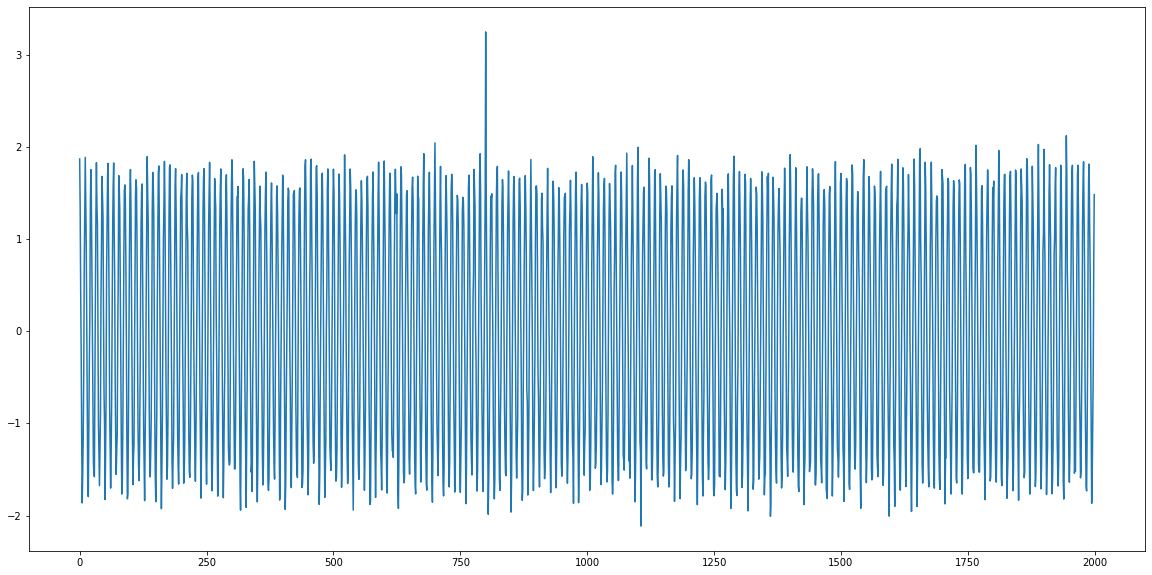

In [29]:
Fs = 1000;
Ts = 1/Fs
n = np.arange(2000)
y = 1.7*np.cos(2*90*np.pi*n*Ts) + 0.15*np.random.normal(0,1,2000) + 1.7*(sc.signal.unit_impulse(2000, 625)+sc.signal.unit_impulse(2000, 800))
plt.figure(figsize=(20,10))
plt.plot(n, y)


### β):

In [30]:
STFT = lb.stft(y, 1024, 20, 40)
print(STFT.shape)

(513, 101)


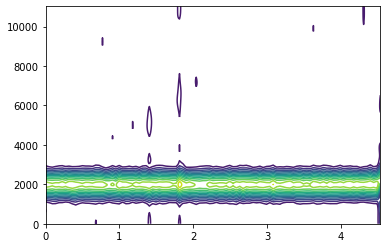

In [31]:
new_t=np.linspace(0,100000/22050,101)
new_f=np.linspace(0,11025,513) 
plt.contour(new_t,new_f,abs(STFT), 15)

### γ):

In [32]:
s = np.power(2, np.linspace(1, 6, 100))
coefs,freqs = pywt.cwt(y, s, 'cmor3.0-1.0')
print(coefs.shape)

(100, 2000)


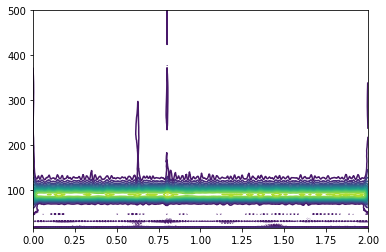

In [33]:
t = np.linspace(0,2,2000)
f = freqs*1000
plt.contour(t,f,np.abs(coefs), 15)

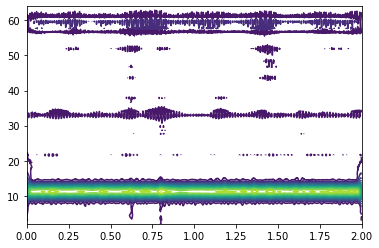

In [34]:
plt.contour(t,s,np.abs(coefs), 15)

### δ):


Σε αυτή την περίπτωση, ο DT-CWT οι ανωμαλίες είναι ξεκάθαρες σε αντίθεση με τον STFT.

# Άσκηση 3

In [52]:
def energy_of(sig):

    len_window = np.array([20,30])
    j = 1
    for i in len_window:
        w = np.hamming(i*16)
        signal_sq = sig**2 
        E = np.convolve(w, signal_sq)

        b = np.zeros(1)
        ok1 = np.concatenate((sig, b))
        ok2 = np.concatenate((b, sig))
        y = np.abs(np.sign(ok1) - np.sign(ok2)) 
        Z = np.convolve(y, w)
       
    plt.subplot(2,1,1)
    plt.plot(Z)
    plt.subplot(2,1,2)
    plt.plot(E)
    return

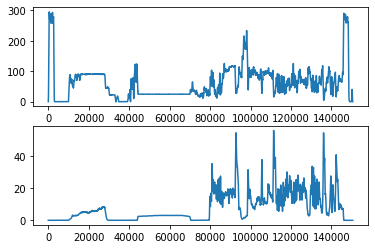

In [54]:
y,fs = lb.load('music.wav', 22050)
energy_of(y)

Παρατηρούμε και για τα δύο σήματα, ότι καθώς αυξάνεται το μήκος παραθύρου μειώνεται η ακρίβεια των ενεργειών βραχέος χρόνου. Επίσης, για διαχωρισμό φωνής από σιωπή ή έμφωνους από άφωνους, δεν μπορούμε να γνωρίζουμε με αρκίβεια, αφού όσο μεγαλύτερο είναι το μήκος παραθύρου τόσο μεγαλύτερος κίνδυνος για να χάσουμε κάποια μετάβαση απο σιωπή σε φωνή και το αντίθετο
Για να ξεχωρίσουμε  φωνή από σιωπή και έμφωνους από άφωνους γνωρίζουμε ότι:
Οι έμφωνοι χαρακτήρες χαρακτηρίζονται από μια περιοδικότητα και σχετικά μεγάλο πλάτος, άρα θα έχουν μεγαλύτερη ενέργεια βραχέος χρόνου και μικρότερο ρυθμό εναλλαγής προσήμου,σε αντίθεση με τους άφωνους ήχους που είναι απεριοδικοί, έχουν χαμηλή ενέργεια βραχέος χρόνου και πολύ υψηλό ρυθμό εναλλαγής προσήμου.Τα σημεία σιωπής έχουν ελάχιστη(~0) μέση τιμή, αλλά παρουσιάζουν περιοδικότητα (λευκός θόρυβος Gauss). Έτσι, έχουν χαμηλή ενέργεια βραχέος χρόνου και χαμηλό ρυθμό εναλλαγής προσήμου σε σχέση με τους έμφωνους ήχους.